In [ ]:
import pandas as pd
import numpy as np
import warnings as ws
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
ws.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.dtypes 

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
df.isna().sum() / len(df)

age         0.0
sex         0.0
cp          0.0
trestbps    0.0
chol        0.0
fbs         0.0
restecg     0.0
thalach     0.0
exang       0.0
oldpeak     0.0
slope       0.0
ca          0.0
thal        0.0
target      0.0
dtype: float64

In [ ]:
X = df.drop("target", axis = 1)
y = df["target"]

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

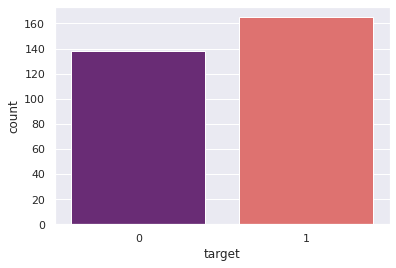

In [ ]:
sns.set()
sns.countplot(df["target"], palette = "magma")
plt.show()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Fitting Logistc Regression Model
lr.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix
print(round(accuracy_score(y_test, y_pred) * 100, 2))

80.33


In [ ]:
conf = confusion_matrix(y_test, y_pred)

In [ ]:
conf

array([[19,  9],
       [ 3, 30]])

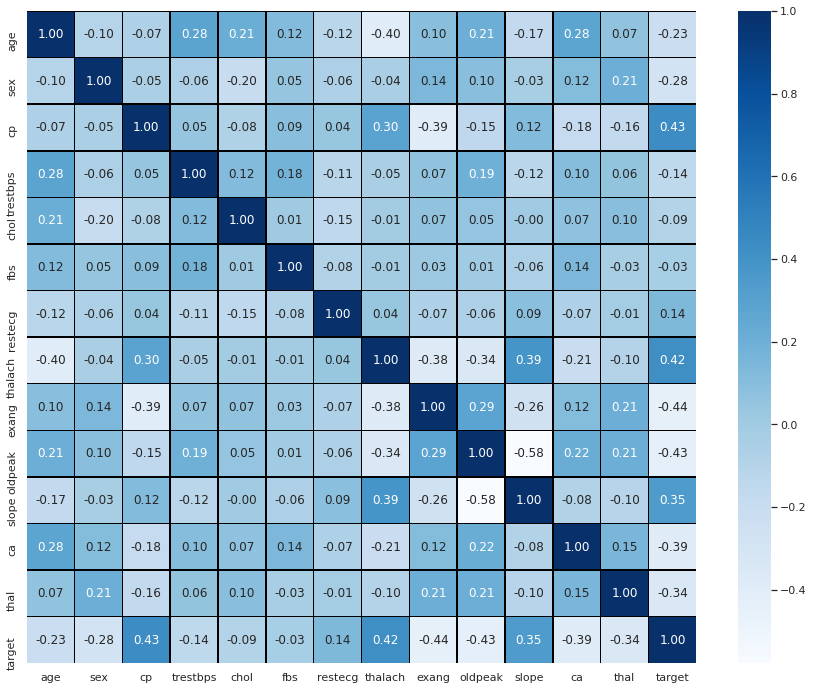

In [ ]:
plt.figure(figsize=(15,12))
sns.heatmap(df.corr(), annot  = True,fmt = ".2f", cmap = "Blues", linewidth = 0.5, linecolor="black")
plt.show() 

In [ ]:
abs(df.corr()["target"])

age         0.225439
sex         0.280937
cp          0.433798
trestbps    0.144931
chol        0.085239
fbs         0.028046
restecg     0.137230
thalach     0.421741
exang       0.436757
oldpeak     0.430696
slope       0.345877
ca          0.391724
thal        0.344029
target      1.000000
Name: target, dtype: float64

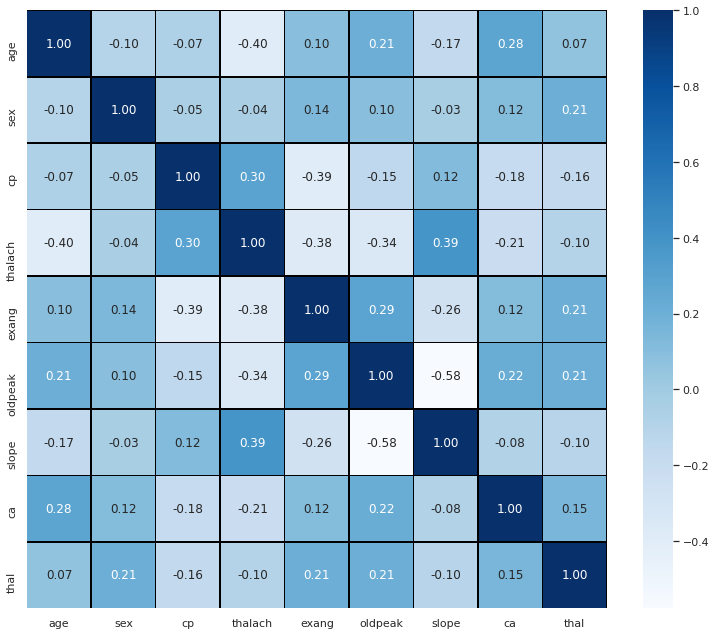

In [ ]:
sorted_feat = df[["age", "sex", "cp", "thalach","exang", "oldpeak","slope", "ca", "thal"]]
plt.figure(figsize = (13,11))
sns.heatmap(sorted_feat.corr(), annot  = True,fmt = ".2f", cmap = "Blues", linewidth = 0.5, linecolor="black")
plt.show()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(sorted_feat, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit (X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_pred = lr.predict(X_test_scaled)

In [ ]:
conf = confusion_matrix(y_test, y_pred)

In [ ]:
conf

array([[18, 10],
       [ 3, 30]])

In [ ]:
from sklearn.linear_model import SGDClassifier
sgdc = SGDClassifier(loss="log")

In [ ]:
sgdc.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=1000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [ ]:
y_predict_sgdc = sgdc.predict(X_test_scaled)

In [ ]:
conf = confusion_matrix(y_test, y_predict_sgdc)
conf

array([[14, 14],
       [ 2, 31]])

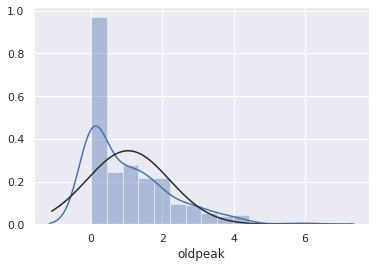

In [60]:
from scipy.stats import norm
sns.set()
sns.distplot(sorted_feat["oldpeak"], fit = norm)
plt.show()

In [ ]:
sorted_feat["oldpeak"] =  np.sqrt(sorted_feat["oldpeak"])

In [69]:
 X_train, X_test, y_train, y_test = train_test_split(sorted_feat, y, test_size = 0.2, random_state = 42, stratify = y)

In [70]:
scaling = StandardScaler()
X_train_scaled = scaling.fit_transform(X_train)
X_test_scaled = scaling.transform(X_test)

In [71]:
from sklearn.svm import SVC
svc = SVC(kernel = "rbf")

In [72]:
svc.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [73]:
y_predict_svc = svc.predict(X_test_scaled)

In [77]:
confus = confusion_matrix(y_test, y_predict_svc)
confus
print(accuracy_score(y_test, y_predict_svc) * 100)

85.24590163934425


In [79]:
from sklearn.model_selection import cross_val_score, KFold
kf = KFold(n_splits = 5, shuffle = True, random_state = 42)
new_svc = SVC(kernel = "rbf")
scoring  = cross_val_score(new_svc, X_train_scaled, y_train, cv =kf, scoring = "roc_auc")

In [86]:
print(round(scoring.mean() *100, 2), "%")


89.77 %
